In [166]:
!pip3 install wordcloud

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 현재 작업 디렉토리를 기준으로 파일 경로 설정
current_dir = os.getcwd()
csv_file_path = os.path.join(current_dir, '..', '..', 'data', 'processed', 'KcELECTRA_preprocessed_reviews.csv')

# CSV 파일 읽기
df = pd.read_csv(csv_file_path, encoding='utf-8-sig')

In [6]:
# 데이터 갯수 확인
print("Total number of rows:", len(df))

# 데이터 샘플 확인 (상위 5개)
print("\nSample data:")
display(df.head())  # DataFrame 출력

# null 값 확인
print("\nNull values in each column:")
display(df.isnull().sum())  # Null 값 확인

Total number of rows: 119855

Sample data:


,Review_Text,Label
0,위험한 식당입니다 여기서 저 난로에 도 화상을 입었습니다 출입구쪽에 서있다가 출입...,0
1,그냥 그저 그럼 메리트는 계란말이 리필해주는거 그냥 냉삼임 별거 없음 시 메리트,0
2,비빔면 걍 팔도 고기도 딱히 맛있지 않았어요,0
3,여기 왜 감 거지여도 안갈듯,0
4,맛은 괜찮은데 기름이 너무 튀어서 힘들었습니다 직원분들도 친절하시고요,1



Null values in each column:


Review_Text    0
Label          0
dtype: int64


Count of each label:


Label
3    39320
2    28658
0    18945
1    17223
4    15709
Name: count, dtype: int64

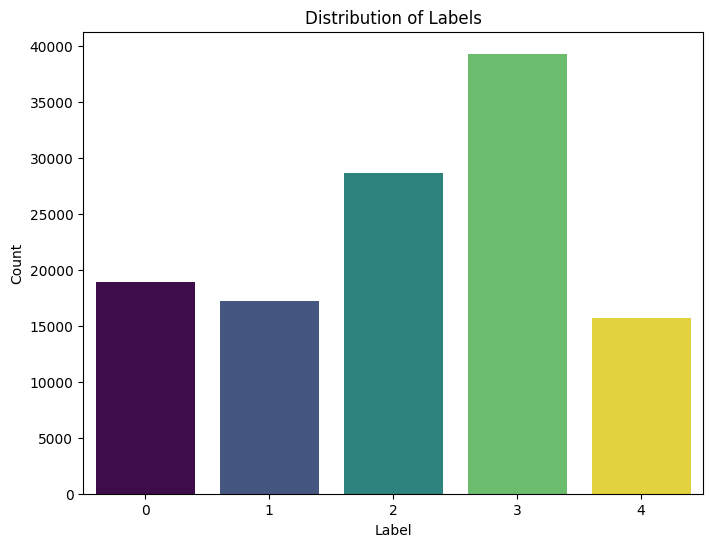

In [7]:
# 레이블별 데이터 갯수 확인
label_counts = df['Label'].value_counts()
print("\nCount of each label:")
display(label_counts)

# 레이블 분포도 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df, hue='Label', palette='viridis', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

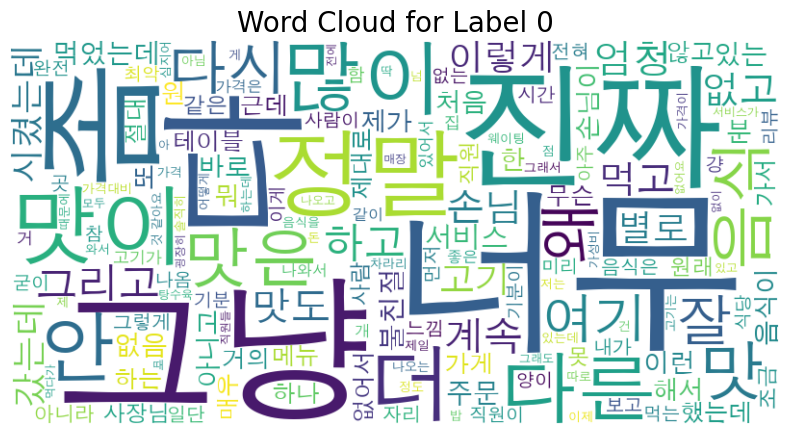

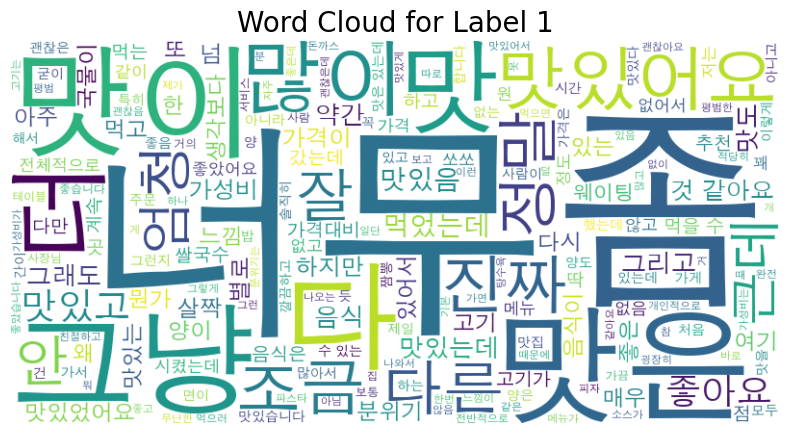

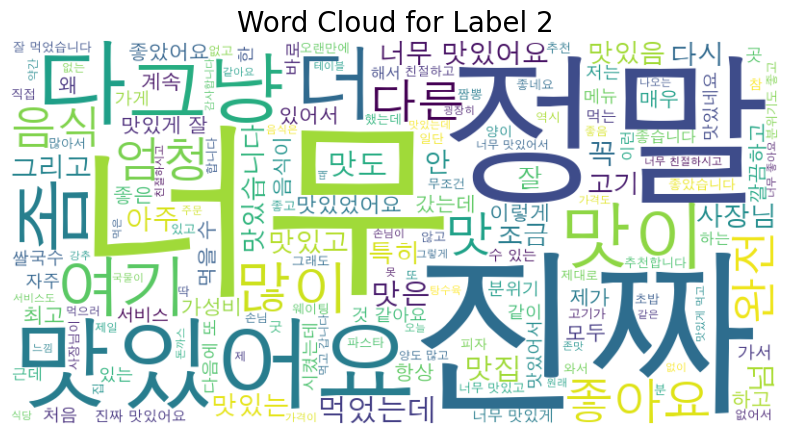

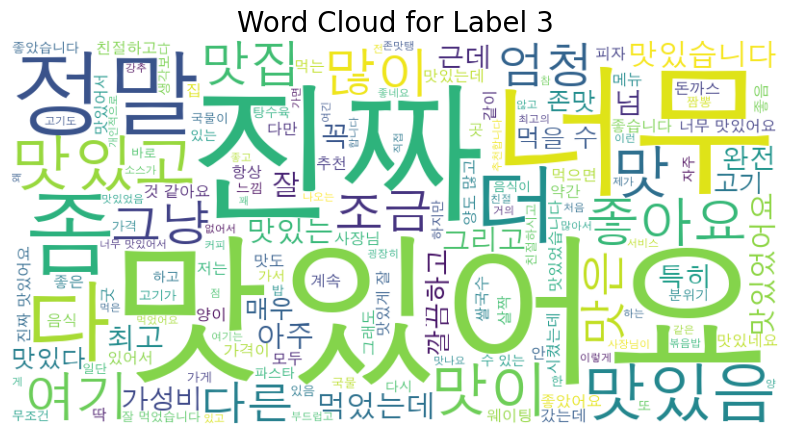

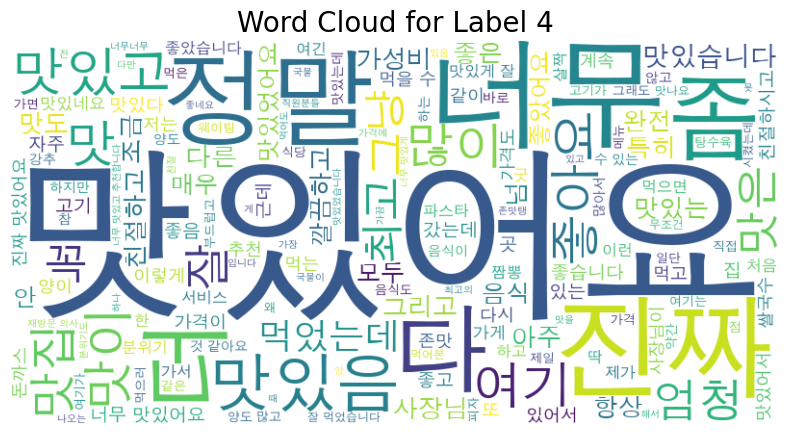

In [8]:
# 워드 클라우드를 위한 stopwords 설정
stopwords = set(STOPWORDS)
stopwords.update(["이", "그", "저", "있다", "하다"])  # 추가적인 불용어를 업데이트할 수 있습니다.

# 워드 클라우드 생성 함수
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(
        width=800,
        height=400,
        font_path='AppleGothic.ttf',  # 폰트 경로 설정
        background_color='white',
        stopwords=stopwords,
        min_font_size=10,
        colormap='viridis'  # 색상맵을 viridis로 설정하여 깔끔하게
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, size=20)
    plt.show()

# 각 레이블에 대한 워드 클라우드 생성
for label in sorted(df['Label'].unique()):
    label_text = " ".join(df[df['Label'] == label]['Review_Text'])
    generate_wordcloud(label_text, title=f"Word Cloud for Label {label}")